**Instalar dependencias necesarias**


In [1]:
!pip install -q tf-agents[reverb]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.0 MB/s eta 0:00:00
   ━━

Verificar que si se descargo 

In [2]:
import tf_agents
print("TF-Agents version:", tf_agents.__version__)


2025-07-10 13:19:52.972281: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-10 13:19:52.972360: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-10 13:19:52.975238: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:596: UserWarning: WARN: plugin: shimmy.registration:register_gymnasium_envs raised Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py", line 594, in load_plugin_envs
    fn()
  File "/usr/local/lib/python3.11/dist-packages/shimmy/r

TF-Agents version: 0.19.0


**PROMT 1**

Quiero trabajar con el entorno Pendulum-v1 utilizando TF-Agents y Gymnasium. Para ello, necesito registrar correctamente el entorno Pendulum-v1 en caso de que no sea reconocido por suite_gym. Luego, deseo cargar dos instancias del entorno: una para entrenamiento (train_env) y otra para evaluación (eval_env), utilizando tf_py_environment de TF-Agents. También quiero imprimir las especificaciones de observación y acción del entorno para verificar su correcta configuración. Además, necesito instalar gymnasium[classic-control] para asegurar la compatibilidad con el entorno clásico del péndulo. Posteriormente, quiero crear una instancia del entorno Pendulum-v1 utilizando gymnasium, con el argumento render_mode="rgb_array" para habilitar la visualización como imagen. Finalmente, quiero definir una función llamada plot_environment() que renderice el entorno y muestre una imagen estática del péndulo utilizando matplotlib. Solicito que me proporciones el código completo para realizar todos estos pasos, organizado y sin errores, compatible con TensorFlow y Gymnasium.

In [3]:
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
import gymnasium as gym
import gymnasium.envs

env_name = "Pendulum-v1"

# Registra el entorno si Gymnasium no lo reconoce con gym clásico
gym.register(id="Pendulum-v1", entry_point="gymnasium.envs.classic_control:PendulumEnv")

# Cargar entorno usando suite_gym (de TF-Agents)
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)


/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment Pendulum-v1 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Para verificar que no hay error

In [4]:
# Verificación
print("Train env:", train_env)
print("Observation spec:", train_env.observation_spec())
print("Action spec:", train_env.action_spec())

Train env: <tf_agents.environments.tf_py_environment.TFPyEnvironment object at 0x7986326b0d50>
Observation spec: BoundedTensorSpec(shape=(3,), dtype=tf.float32, name='observation', minimum=array([-1., -1., -8.], dtype=float32), maximum=array([1., 1., 8.], dtype=float32))
Action spec: BoundedTensorSpec(shape=(1,), dtype=tf.float32, name='action', minimum=array(-2., dtype=float32), maximum=array(2., dtype=float32))


Instala Gymnasium

In [5]:
pip install gymnasium[classic-control]


Note: you may need to restart the kernel to use updated packages.


Se importa correctamente desde gymnasium


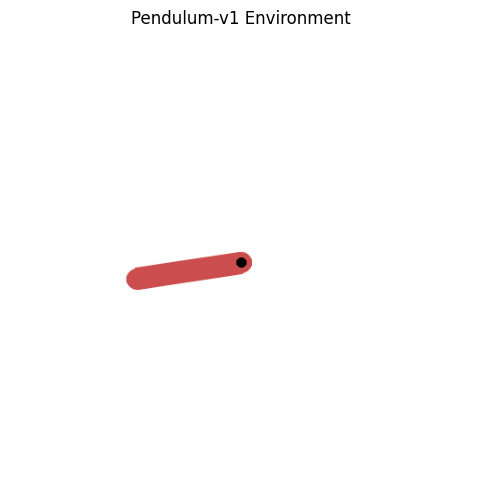

In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt

# Crear entorno con render_mode adecuado (sólo funciona en gymnasium)
env = gym.make("Pendulum-v1", render_mode="rgb_array")
obs, _ = env.reset(seed=42)

# Visualizar el entorno
def plot_environment(env, figsize=(6, 6)):
    img = env.render()  # Devuelve imagen RGB
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Pendulum-v1 Environment")
    plt.show()

# Mostrar una imagen del entorno
plot_environment(env)


**PROMT 2**

Define los hiperparámetros necesarios para entrenar un agente DDPG (DdpgAgent) en el entorno Pendulum-v1 usando TF-Agents. Incluye los parámetros globales de entrenamiento como número de iteraciones, pasos de recolección inicial, tamaño del replay buffer, batch size, etc. También incluye los hiperparámetros específicos del agente DDPG: tamaño de las capas ocultas para el actor y el crítico, tasas de aprendizaje, el parámetro gamma (descuento de recompensa), el parámetro tau (actualización suave de redes objetivo), y los parámetros del proceso de exploración Ornstein-Uhlenbeck (ou_stddev, ou_damping). Organiza el código como una celda de notebook clara y estructurada

In [7]:
# Hiperparámetros globales de entrenamiento
num_iterations = 25000               # Número total de iteraciones de entrenamiento
initial_collect_steps = 1000         # Pasos de recolección iniciales antes de entrenar
collect_steps_per_iteration = 1      # Pasos de recolección por iteración
replay_buffer_capacity = 100000      # Tamaño del buffer de repetición

batch_size = 64                      # Tamaño del batch para entrenamiento
log_interval = 200                   # Frecuencia de impresión de métricas
eval_interval = 1000                 # Frecuencia de evaluación del agente
num_eval_episodes = 10               # Episodios para evaluación

# Hiperparámetros del agente DDPG
actor_fc_layers = (400, 300)         # Capas ocultas del actor
critic_obs_fc_layers = ()            # Sin capas ocultas para la parte de observación del crítico
critic_action_fc_layers = ()         # Sin capas ocultas para la parte de acción del crítico
critic_joint_fc_layers = (400, 300)  # Capas conjuntas del crítico

actor_learning_rate = 1e-4           # Tasa de aprendizaje del actor
critic_learning_rate = 1e-3          # Tasa de aprendizaje del crítico

gamma = 0.99                         # Factor de descuento de recompensa
tau = 0.005                          # Parámetro tau para soft updates de las redes objetivo

# Parámetros del proceso de exploración (Ornstein-Uhlenbeck noise)
ou_stddev = 0.2                      # Desviación estándar
ou_damping = 0.15                    # Tasa de amortiguación del ruido


**PROMT 3**

Define las redes neuronales necesarias para un agente DDPG (DdpgAgent) en el entorno Pendulum-v1 usando TF-Agents. Crea una red actor determinista que reciba la observación y devuelva una acción continua, utilizando la clase ActorNetwork desde tf_agents.agents.ddpg.actor_network. Luego, define una red crítica que reciba como entrada una tupla (observación, acción) y devuelva el valor estimado Q, utilizando la clase CriticNetwork desde tf_agents.agents.ddpg.critic_network. Usa los tamaños de capa definidos en los hiperparámetros (actor_fc_layers y critic_fc_layers). Al final, imprime una verificación que confirme que las redes fueron creadas correctamente.

In [8]:
import tensorflow as tf
import numpy as np
from tf_agents.agents.ddpg.actor_network import ActorNetwork
from tf_agents.agents.ddpg.critic_network import CriticNetwork
from tf_agents.specs import tensor_spec
from tf_agents.utils import common

# Hiperparámetros de red definidos previamente
actor_fc_layers = (400, 300)
critic_obs_fc_layers = ()
critic_action_fc_layers = ()
critic_joint_fc_layers = (400, 300)

# Obtener especificaciones del entorno
observation_spec = train_env.observation_spec()
action_spec = train_env.action_spec()
time_step_spec = train_env.time_step_spec()

# Red Actor: genera acción continua dada la observación
actor_net = ActorNetwork(
    input_tensor_spec=observation_spec,
    output_tensor_spec=action_spec,
    fc_layer_params=actor_fc_layers,
    activation_fn=tf.keras.activations.relu,
    name='ActorNetwork'
)

# Red Crítico: estima valor Q dado (observación, acción)
critic_net = CriticNetwork(
    input_tensor_spec=(observation_spec, action_spec),
    observation_fc_layer_params=critic_obs_fc_layers,
    action_fc_layer_params=critic_action_fc_layers,
    joint_fc_layer_params=critic_joint_fc_layers,
    activation_fn=tf.keras.activations.relu,
    name='CriticNetwork'
)

# ======= ✅ Verificación práctica =======

# Crear observación y acción de prueba
sample_obs = tf.convert_to_tensor(
    np.random.random(size=(1,) + observation_spec.shape).astype(np.float32)
)

sample_action = tf.convert_to_tensor(
    np.random.uniform(low=action_spec.minimum, high=action_spec.maximum, size=(1,) + action_spec.shape).astype(np.float32)
)

# Evaluar redes
sample_action_output, _ = actor_net(sample_obs)
sample_q_value, _ = critic_net((sample_obs, sample_action))

# Imprimir resultados
print("✅ ActorNetwork y CriticNetwork creados correctamente.")
print("Acción generada por ActorNetwork:", sample_action_output.numpy())
print("Valor Q estimado por CriticNetwork:", sample_q_value.numpy())


✅ ActorNetwork y CriticNetwork creados correctamente.
Acción generada por ActorNetwork: [[-0.00229035]]
Valor Q estimado por CriticNetwork: [-0.00065284]


**PROMT 4**

Crea un agente DDPG (DdpgAgent) utilizando TF-Agents para el entorno Pendulum-v1. Usa las redes actor_net y critic_net previamente definidas, y configura el agente con los hiperparámetros correspondientes, como las tasas de aprendizaje para el actor y el crítico (actor_lr, critic_lr), el factor de descuento gamma, el parámetro de actualización suave tau, y los parámetros de ruido Ornstein-Uhlenbeck para la exploración (ou_stddev, ou_damping). Asegúrate de definir un contador de pasos train_step y llamar a agent.initialize(). Al final, imprime un mensaje de verificación para confirmar que el agente fue creado correctamente.

In [9]:
from tf_agents.agents.ddpg.ddpg_agent import DdpgAgent
from tf_agents.train.utils import train_utils
from tf_agents.trajectories import time_step as ts
from tf_agents.utils import common
from tf_agents.policies.ou_noise_policy import OUNoisePolicy
from tensorflow.keras.optimizers import Adam

# ==== Hiperparámetros ====
actor_learning_rate = 1e-4
critic_learning_rate = 1e-3
gamma = 0.99
tau = 0.005
ou_stddev = 0.2
ou_damping = 0.15

# ==== Contador global de pasos ====
train_step = train_utils.create_train_step()

# ==== Optimizadores ====
actor_optimizer = Adam(learning_rate=actor_learning_rate)
critic_optimizer = Adam(learning_rate=critic_learning_rate)

# ==== Crear el agente DDPG ====
agent = DdpgAgent(
    time_step_spec=train_env.time_step_spec(),
    action_spec=action_spec,
    actor_network=actor_net,
    critic_network=critic_net,
    actor_optimizer=actor_optimizer,
    critic_optimizer=critic_optimizer,
    ou_stddev=ou_stddev,
    ou_damping=ou_damping,
    target_update_tau=tau,
    target_update_period=1,
    gamma=gamma,
    reward_scale_factor=1.0,
    gradient_clipping=None,
    debug_summaries=False,
    summarize_grads_and_vars=False,
    train_step_counter=train_step
)

# Inicializar variables del agente
agent.initialize()

# ✅ Verificación
print("✅ Agente DDPG creado e inicializado correctamente.")
print("Train step (contador):", train_step.numpy())


✅ Agente DDPG creado e inicializado correctamente.
Train step (contador): 0


**PROMT 5**

Configura los componentes necesarios para que el agente DDPG recolecte experiencias del entorno. Usa la política de recolección del agente (agent.collect_policy) para interactuar con el entorno train_env. Crea un TFUniformReplayBuffer con las especificaciones de datos del agente, el batch_size del entorno y una capacidad máxima definida en los hiperparámetros. Luego, configura un DynamicStepDriver que recolecte transiciones paso a paso utilizando esa política, y almacene las experiencias directamente en el buffer. También puedes incluir una métrica opcional para contar episodios. Al final, imprime un mensaje de verificación que confirme que la política, el buffer y el driver fueron configurados correctamente.

In [10]:
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver
from tf_agents.metrics import tf_metrics
from tf_agents.trajectories import trajectory

# ==== Hiperparámetros de almacenamiento ====
replay_buffer_capacity = 100000
collect_steps_per_iteration = 1

# ==== Crear Replay Buffer ====
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,       # Especificación de datos del agente
    batch_size=train_env.batch_size,         # Tamaño por lote del entorno (normalmente 1)
    max_length=replay_buffer_capacity        # Capacidad máxima del buffer
)

# ==== Métrica opcional ====
episode_counter = tf_metrics.NumberOfEpisodes()

# ==== Crear el Driver dinámico ====
collect_driver = DynamicStepDriver(
    env=train_env,
    policy=agent.collect_policy,
    observers=[replay_buffer.add_batch, episode_counter],
    num_steps=collect_steps_per_iteration
)

# ✅ Verificación
print("✅ Política de recolección, buffer y driver configurados correctamente.")
print("Replay buffer capacity:", replay_buffer_capacity)
print("Collect steps per iteration:", collect_steps_per_iteration)


✅ Política de recolección, buffer y driver configurados correctamente.
Replay buffer capacity: 100000
Collect steps per iteration: 1


**PROMT 6**

Antes de entrenar al agente DDPG, recolecta una cantidad inicial de experiencias usando una política completamente aleatoria (RandomTFPolicy). Esta política actuará sobre el entorno train_env durante una cantidad de pasos definidos por initial_collect_steps. Para ello, configura un DynamicStepDriver con esta política aleatoria y el replay buffer como observador, para almacenar las transiciones recolectadas. Ejecuta el driver para llenar el buffer inicial. Al final, imprime un mensaje que confirme que la recolección inicial fue completada correctamente.

In [11]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver
from tf_agents.trajectories import trajectory

# ==== Hiperparámetro definido previamente ====
initial_collect_steps = 1000

# ==== Crear política aleatoria basada en las especificaciones del entorno ====
random_policy = RandomTFPolicy(
    time_step_spec=train_env.time_step_spec(),
    action_spec=train_env.action_spec()
)

# ==== Crear driver para recolección inicial ====
initial_collect_driver = DynamicStepDriver(
    env=train_env,
    policy=random_policy,
    observers=[replay_buffer.add_batch],
    num_steps=initial_collect_steps
)

# ==== Ejecutar el driver ====
final_time_step, final_policy_state = initial_collect_driver.run()

# ✅ Verificación
print(f"✅ Recolección inicial completada: {initial_collect_steps} pasos almacenados en el buffer.")


✅ Recolección inicial completada: 1000 pasos almacenados en el buffer.


**PROMT 7**

Crea un dataset a partir del replay buffer configurado previamente, para usarlo como fuente de experiencias durante el entrenamiento del agente DDPG. Usa el método as_dataset del buffer, especificando el batch_size y num_steps=2 para obtener transiciones completas (s, a, r, s′). Crea un iterador con iter(...) para obtener muestras del dataset. Luego, verifica el funcionamiento del dataset extrayendo un batch con next(iterator) y mostrando la forma de las observaciones, acciones y recompensas.

In [12]:
# ==== Hiperparámetro ====
batch_size = 64  # Ya definido previamente

# ==== Crear dataset desde el replay buffer ====
dataset = replay_buffer.as_dataset(
    sample_batch_size=batch_size,
    num_steps=2,
    single_deterministic_pass=False
).prefetch(3)  # Mejora el rendimiento de entrenamiento

# ==== Crear iterador del dataset ====
iterator = iter(dataset)

# ==== Extraer un batch para verificar ====
experience, _ = next(iterator)

# ==== Verificación de formas ====
print("✅ Batch extraído del dataset.")
print("Observations shape:", experience.observation.shape)
print("Actions shape:", experience.action.shape)
print("Rewards shape:", experience.reward.shape)


✅ Batch extraído del dataset.
Observations shape: (64, 2, 3)
Actions shape: (64, 2, 1)
Rewards shape: (64, 2)


**PROMT 8**

Implementa el ciclo de entrenamiento del agente DDPG en el entorno Pendulum-v1 utilizando TF-Agents. Durante cada iteración, el agente recolecta datos con el collect_driver, obtiene un batch del dataset del replay buffer y realiza un paso de entrenamiento (agent.train). Cada eval_interval pasos, evalúa la política entrenada ejecutando num_eval_episodes episodios y almacenando el reward promedio. Al final del entrenamiento, grafica el reward promedio por evaluación para visualizar el aprendizaje del agente.

Training DDPG Agent:   0%|          | 0/25000 [00:00<?, ?it/s]

Iteración 0 — Loss: 4.7697 — Reward Promedio: -1202.18
Iteración 1000 — Loss: 0.2389 — Reward Promedio: -1486.34
Iteración 2000 — Loss: 1.8247 — Reward Promedio: -884.60
Iteración 3000 — Loss: 1.9181 — Reward Promedio: -295.30
Iteración 4000 — Loss: 2.2474 — Reward Promedio: -234.32
Iteración 5000 — Loss: 1.8443 — Reward Promedio: -114.90
Iteración 6000 — Loss: 3.7214 — Reward Promedio: -156.50
Iteración 7000 — Loss: 6.8850 — Reward Promedio: -151.28
Iteración 8000 — Loss: 6.9701 — Reward Promedio: -141.45
Iteración 9000 — Loss: 13.9471 — Reward Promedio: -166.51
Iteración 10000 — Loss: 10.0596 — Reward Promedio: -205.06
Iteración 11000 — Loss: 15.9767 — Reward Promedio: -169.20
Iteración 12000 — Loss: 16.0129 — Reward Promedio: -156.06
Iteración 13000 — Loss: 16.1391 — Reward Promedio: -135.52
Iteración 14000 — Loss: 3.3329 — Reward Promedio: -126.76
Iteración 15000 — Loss: 19.8718 — Reward Promedio: -144.20
Iteración 16000 — Loss: 11.6220 — Reward Promedio: -139.84
Iteración 17000 — 

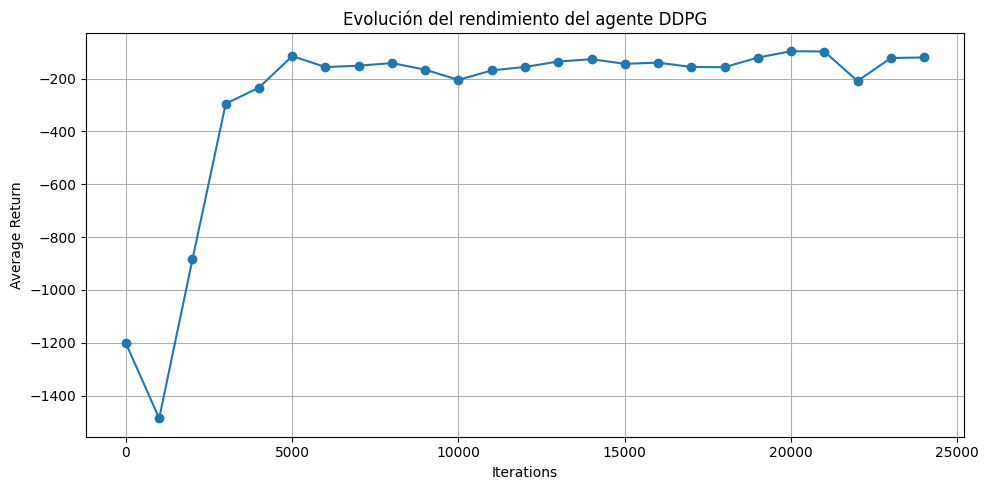

In [13]:
import matplotlib.pyplot as plt
from tqdm.notebook import trange
import numpy as np

# ==== Hiperparámetros definidos anteriormente ====
num_iterations = 25000
eval_interval = 1000
num_eval_episodes = 10

# ==== Lista para almacenar rewards promedio ====
avg_return_list = []

# ==== Función de evaluación de política ====
def compute_avg_return(environment, policy, num_episodes=10):
    total_return = 0.0
    for _ in range(num_episodes):
        time_step = environment.reset()
        episode_return = 0.0
        while not time_step.is_last():
            action_step = policy.action(time_step)
            time_step = environment.step(action_step.action)
            episode_return += time_step.reward
        total_return += episode_return
    avg_return = total_return / num_episodes
    return avg_return.numpy()[0]

# ==== Ciclo principal de entrenamiento ====
for iteration in trange(num_iterations, desc="Training DDPG Agent"):

    # 1. Recolectar experiencia con collect_policy
    collect_driver.run()

    # 2. Tomar un batch del dataset (del replay buffer)
    experience, _ = next(iterator)

    # 3. Entrenar el agente con la experiencia
    train_loss = agent.train(experience).loss

    # 4. Evaluación periódica
    if iteration % eval_interval == 0:
        avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
        avg_return_list.append(avg_return)
        print(f"Iteración {iteration} — Loss: {train_loss:.4f} — Reward Promedio: {avg_return:.2f}")

# ==== Visualización corregida ====
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(avg_return_list)) * eval_interval, avg_return_list, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.title("Evolución del rendimiento del agente DDPG")
plt.grid(True)
plt.tight_layout()
plt.show()


**PROMT 9**

Genera dos videos para el entorno Pendulum-v1 en Gymnasium, uno usando el agente DDPG entrenado y otro usando una política aleatoria (no entrenada). Usa imageio para guardar ambos como archivos .mp4 y asegúrate de que se guarden en una carpeta /kaggle/working/videos. El video debe tener 200 pasos y usarse render_mode='rgb_array'. También quiero que imprima la ruta de cada archivo generado

In [14]:
import imageio
import os
import tensorflow as tf
import gymnasium as gym
from tf_agents.trajectories import time_step as ts

# 📁 Asegurar carpeta de salida
video_dir = "/kaggle/working/videos"
os.makedirs(video_dir, exist_ok=True)

def generate_video(policy=None, filename="pendulum.mp4", seed=0, max_steps=200):
    # Crear entorno visualizable
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
    frames = []

    obs, _ = env.reset(seed=seed)

    for _ in range(max_steps):
        if policy is None:
            action = env.action_space.sample()
        else:
            # Crear TimeStep desde la observación actual
            time_step = ts.restart(tf.convert_to_tensor([obs], dtype=tf.float32))
            action = policy.action(time_step).action.numpy()[0]
        
        obs, _, terminated, truncated, _ = env.step(action)
        frames.append(env.render())

        if terminated or truncated:
            break

    # Guardar video
    path = os.path.join(video_dir, filename)
    imageio.mimsave(path, frames, fps=30)
    print(f"🎥 Video guardado en: {path}")


In [15]:
# 🎥 Video del agente DDPG entrenado
generate_video(policy=agent.policy, filename="ddpg_trained.mp4", seed=123)

# 🎥 Video con una política aleatoria
generate_video(policy=None, filename="random_policy.mp4", seed=123)


🎥 Video guardado en: /kaggle/working/videos/ddpg_trained.mp4
🎥 Video guardado en: /kaggle/working/videos/random_policy.mp4


In [16]:
from IPython.display import HTML
import base64

def display_video(filename):
    path = f"/kaggle/working/videos/{filename}"
    with open(path, "rb") as f:
        video_file = f.read()
    encoded = base64.b64encode(video_file).decode("ascii")
    return HTML(f"""
    <video width="480" height="360" controls>
        <source src="data:video/mp4;base64,{encoded}" type="video/mp4">
    </video>
    """)


In [17]:
# Mostrar video del agente entrenado
display_video("ddpg_trained.mp4")


In [18]:
# Mostrar video de la política aleatoria
display_video("random_policy.mp4")
